## ANÁLISIS PREDICTIVO DE SENTIMIENTOS DE TWITTER PARA BITCOIN

## Limpieza de la base de datos

 1. Importar las librerías para poder importar la data

In [2]:
import pandas as pd
import numpy as np

2. Importar la data

In [3]:
## La data se enuentra en archivo tipo ".csv" y está separado mediante comas.
data = pd.read_csv('tweets.csv',sep=',')

3. Visualizar la data para escoger los campos con los que se va a trabajar

In [4]:
# Se utiliza sample para ver 5 datos aleatorios de la data.
data.sample(5)

,tweet_id,timestamp,user_id,screen_name,full_name,text,hashtags,mentions,retweet_count,retweet_user,favorite_count,tweet_sentiment
2268,1657547117714391041,2023-05-14 00:43:23+00:00,805160271388049408,NEEDcreations,🧡NEEDcreations is stacking sats & jamming to EDM,@luke_broyles @cjasonmaier @gwhoffmeister @BTC...,[],"['luke_broyles', 'cjasonmaier', 'gwhoffmeister...",0,[],2,NaN
423,1657530379916517376,2023-05-13 23:36:52+00:00,1258165309460090883,TodaywithHannah,Hannah Anderson 🇺🇸 🌎,@latimes I'm willing to show 10 lucky people o...,[],['latimes'],0,[],0,NaN
2321,1657547568492994560,2023-05-14 00:45:10+00:00,1664372940,adiksayo1122,Crypto Insider,💰💸 Over $5M+ has been paid to loyal $HODL inve...,"['HODL', 'coinbase', 'BTC']",['HODL_Official'],0,[],0,NaN
3004,1657554401073016832,2023-05-14 01:12:19+00:00,131736177,LilFurbby,Cammykakez,"👇Just claimed $GPEPE, thanks for the heads up....",['PEPE'],[],0,[],0,NaN
7111,1657600637394190342,2023-05-14 04:16:03+00:00,1489536502371598338,AltpartyIO,AltParty.io,Top 5 #altcoins that outperformed $BTC on the ...,"['altcoins', 'altparty', 'DYOR']",[],0,[],0,NaN


In [5]:
# Se usa .info para saber los tipos de datos y si hay nulos.
data.info()
# No hay nulos en el data frame "data"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10041 entries, 0 to 10040
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         10041 non-null  int64  
 1   timestamp        10041 non-null  object 
 2   user_id          10041 non-null  int64  
 3   screen_name      10041 non-null  object 
 4   full_name        10041 non-null  object 
 5   text             10041 non-null  object 
 6   hashtags         10041 non-null  object 
 7   mentions         10041 non-null  object 
 8   retweet_count    10041 non-null  int64  
 9   retweet_user     10041 non-null  object 
 10  favorite_count   10041 non-null  int64  
 11  tweet_sentiment  0 non-null      float64
dtypes: float64(1), int64(4), object(7)
memory usage: 941.5+ KB


	
4.Se utilizará la columna 'text' para analizar y predecir si el resultado podría ser positivo o negativo. 

La columna 'text' tiene palabras en otros idiomas, pero se utilizarán los que están en el idioma español e inglés.

Para eliminar palabras que no sean español o inglés de una base de datos en Python, se utilizará la biblioteca langdetect.

Esta biblioteca permite detectar automáticamente el idioma de un texto dado.

In [6]:
#Se instala la librería langdetect con pip install.
# pip install langdetect

5. Se importa la función 'detect' desde la biblioteca langdetect para detectar el idioma deseado de un texto.

In [7]:
from langdetect import detect

6. Se realiza una función para detectar las palabras en español e inglés  y que eliminen las que no.

In [8]:

def es_ingles_o_espanol(palabra): # Toma como parámetro una palabra y devuelve un valor booleano (V o F) sabiendo si es palabra en español e inglés.
    if not palabra:
        return False # Si la palabra está vacía o nula devuelve 'False'.
    try:
        idioma = detect(palabra)
        return idioma == 'es' or idioma == 'en' # Si el idioma es español e inglés devuelve 'True'.
    except:
        return False  # Si la palabra tiene un error o no se procesa correctamente devuelve 'False'.

7. Se aplica la función en la base de datos y las palabras que no sean en español e inglés las reemplaza con '|'

In [9]:
# Eliminar palabras que no sean español o inglés
data['text'] = data['text'].apply(lambda palabra: '|' if not es_ingles_o_espanol(palabra) else palabra)

8. Se guardan los resultados en una nueva base de datos llamada 'nuevostweets'.

In [10]:
data.to_csv('nuevostweets.csv', index=False)

In [11]:
# Se le porporciona un nombre a la nueva data
data2 = pd.read_csv('nuevostweets.csv',sep=',')

In [12]:
# Se usa sample para ver aleatoriamente los datos.
data2.sample(5)

,tweet_id,timestamp,user_id,screen_name,full_name,text,hashtags,mentions,retweet_count,retweet_user,favorite_count,tweet_sentiment
575,1657531873088901120,2023-05-13 23:42:48+00:00,1553203534912700416,web3news5,Bitcoinニュース速報🛸web3🐐,|,"['cointelegraph', 'BTC']",[],0,[],0,NaN
2107,1657545496540467201,2023-05-14 00:36:56+00:00,1532140161181847552,Beckabandonar,Quincey 🦖,BTC price bounces at $25.8K lows amid warning ...,"['crypto', 'marketanalysis']",[],0,[],1,NaN
2509,1657549642777731077,2023-05-14 00:53:25+00:00,1432609180905508865,BeDotSol,🅱️e.Sol | tD 👑,Dear @ercwl - we are very open and accepting o...,[],['ercwl'],0,[],1,NaN
4211,1657568758993674241,2023-05-14 02:09:22+00:00,1639162651346636800,kawa078241,栄子@専業トレーダー,|,['BTC'],[],4,"['amiami12217', 'aryan57483', 'hase_gawa_44', ...",21,NaN
6888,1657597911885295618,2023-05-14 04:05:13+00:00,1573871389161193484,Ami80947307,Ami🌊伝説の♥️メリッシュ🏃‍♀️,|,[],[],0,[],1,NaN


9. Se eliminan las filas que tienen el símbolo '|'.

In [13]:
data2 = data2[data2['text'] != '|']

10. Se observa si hay nulos y la cantidad de datos finales a utilizar

In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 10040
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         7787 non-null   int64  
 1   timestamp        7787 non-null   object 
 2   user_id          7787 non-null   int64  
 3   screen_name      7787 non-null   object 
 4   full_name        7787 non-null   object 
 5   text             7787 non-null   object 
 6   hashtags         7787 non-null   object 
 7   mentions         7787 non-null   object 
 8   retweet_count    7787 non-null   int64  
 9   retweet_user     7787 non-null   object 
 10  favorite_count   7787 non-null   int64  
 11  tweet_sentiment  0 non-null      float64
dtypes: float64(1), int64(4), object(7)
memory usage: 790.9+ KB


11. Se comprueba que no hay datos en el campo texto con el símbolo '|'.

In [15]:
data2.sample(5)

,tweet_id,timestamp,user_id,screen_name,full_name,text,hashtags,mentions,retweet_count,retweet_user,favorite_count,tweet_sentiment
965,1657535333590880260,2023-05-13 23:56:33+00:00,3647823495,causeactivators,Cause Activators,👇Thank you $YODA for the airdrop i got mine🚀 🦨...,[],[],0,[],0,NaN
9752,1657653577404366848,2023-05-14 07:46:25+00:00,1701489031,AdeliaP_17,Adelia Putri,1 🚨 $psyop is coming to Arbitrum.\n\n$BEN is b...,[],[],0,[],0,NaN
6744,1657596674259255298,2023-05-14 04:00:18+00:00,1094879552361373698,kurneoldu,Kur Ne Oldu,"⏰ 07:00 \n🥇 #BTC = 26,882.58 $ \n#bitcoin #bt...","['BTC', 'bitcoin', 'btc', 'BTCUSD']",[],0,[],0,NaN
2101,1657545440030498822,2023-05-14 00:36:43+00:00,1466591318466080774,BC_of_BTC,Bitcoin Made This Possible,@PantherFan87 @J0nSPEC @ScooterMagruder There ...,[],"['PantherFan87', 'J0nSPEC', 'ScooterMagruder']",0,[],0,NaN
8769,1657611921627987969,2023-05-14 05:00:53+00:00,1413515007355146240,optionstrackbot,coinoptionstrack bot,🟥 $BTC block trade alert [Deribit] 🧱🧱 \n\nJUL(...,[],[],0,[],0,NaN


12. Se convierte la columna 'timestamp' en un objeto datetime

In [16]:
data2['timestamp'] = pd.to_datetime(data2['timestamp'])

13. Se extrae solo la fecha en una nueva columna llamada 'fecha'.

In [17]:
data2['fecha'] = data2['timestamp'].dt.date

14. Se comprueba que exista la columna 'fecha'

In [18]:
data2.sample(5)

,tweet_id,timestamp,user_id,screen_name,full_name,text,hashtags,mentions,retweet_count,retweet_user,favorite_count,tweet_sentiment,fecha
4694,1657574499330539521,2023-05-14 02:32:11+00:00,948551073387642880,DYORCryptoBot,DYOR.net Crypto,[Scan results - Gate·io - 15m]\n\nTop 5 bullis...,[],[],1,['eos__global'],1,NaN,2023-05-14
8682,1657611578680700928,2023-05-14 04:59:31+00:00,2278426806,mark94121,mark,HI I'm an AI bot I will show my result\nfor in...,"['doge', 'dogechallenge', 'AI', 'tradingAI', '...",[],0,[],0,NaN,2023-05-14
3520,1657560442871373833,2023-05-14 01:36:20+00:00,1586826808829349890,Justlerkinghere,Cryptos into my wallet,Unleash your #crypto &amp; $BTC trading potent...,"['crypto', 'ETH', 'BTC', 'InLiqsWeTrust']",['kingfisher_btc'],0,[],0,NaN,2023-05-14
5437,1657582460367151105,2023-05-14 03:03:49+00:00,7622102,memobug,Dr Ouchie,@btc_ltc @mjr_nightmare @4Mischief You’re fool...,[],"['btc_ltc', 'mjr_nightmare', '4Mischief']",0,[],0,NaN,2023-05-14
7142,1657601052634411013,2023-05-14 04:17:42+00:00,469956482,vvauskla,vvauskla,Ecstasy pills💊\n#ecstasy #xtc #kenzotigers #Ma...,"['ecstasy', 'xtc', 'kenzotigers', 'Maserati', ...",[],0,[],0,NaN,2023-05-14


In [19]:
# Se eliminan las columnas que no se van a utilizar
columnas_eliminar = ['tweet_id', 'timestamp','user_id','screen_name','full_name','hashtags','mentions','retweet_count','retweet_user','favorite_count','tweet_sentiment']
data2 = data2.drop(columnas_eliminar, axis=1)

## Ver la disperción de los datos

1. Se instala la librería 'wordcloud' para poder visualizar las palabras repetidas.

In [20]:
# pip install wordcloud

2. Se Importa WordCloud

In [21]:
from wordcloud import WordCloud

3. Se crea una variable text de la columna del dataframe para la visualización.

In [22]:
text=data2['text']

4. Se usa WordCloud para la visualización de nube de palabras en una variable.

In [23]:
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_font_size=150, random_state=42).generate(str(text))

5. Se importa matplotlib.pyplot para graficar.

In [24]:
import matplotlib.pyplot as plt

6. Se carga la gráfica para poder observar las palabras repetidas.

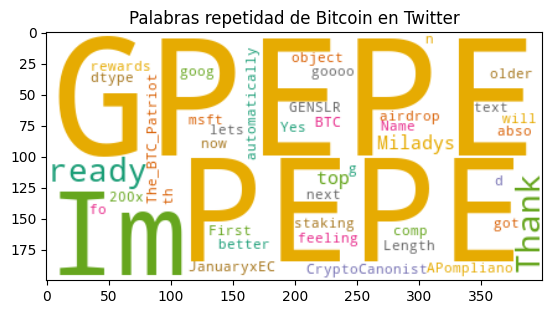

In [25]:
plt.imshow(wordcloud,interpolation='bilinear')
plt.title ('Palabras repetidad de Bitcoin en Twitter')
plt.show()

## Categorizar el texto

In [26]:
# https://www.arsys.es/blog/analisis-sentimientos-python-jupyter-notebooks

1. Se instala el paquete 'nltk' de Natural Language Toolkit que procesa el leguaje natural.

In [27]:
pip install --user nltk


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\MI PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


2. Se importa 'nltk' para usar los recursos del paquete instalado.

In [28]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
nltk.download('vader_lexicon') # Descarga vader_lexicon para el análisis de sentimientos.
nltk.download('punkt') # Descarga punkt, un modelo de toquenización que divide el texto en palabras individuales

[nltk_data] Downloading package vader_lexicon to C:\Users\MI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\MI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

3. Se crea una valiable para que inicie el analizador de sentimientos VADER.

In [29]:
analizador = SentimentIntensityAnalyzer()

4. Se crea una función para obtener el puntaje del sentimiento entre los valores (1 y -1), donde 1 es positivo y -1 es negativo.


In [30]:
def Puntaje_Sentimiento(text):
    tokens = word_tokenize(text)  # Tokenizar el texto
    scores = analizador.polarity_scores(text)  # Obtener los puntajes de sentimiento
    return scores['compound']  # Retornar el puntaje compuesto

5. Se aplica la función 'Puntaje_Sentimiento' en el dataframe.

In [31]:
data2['score_sentimientos'] = data2['text'].apply(Puntaje_Sentimiento)

6. Se comprueba si está la columna 'score_sentimientos'.

In [32]:
data2.sample(5)

,text,fecha,score_sentimientos
5837,@btc_bryan_21 @EdKrassen That’s like saying “t...,2023-05-14,-0.2112
552,@Forbes @ForbesVetted I'm willing to show 10 l...,2023-05-13,0.5244
3282,@BitcoinMagazine Do we have a projected date? ...,2023-05-14,0.0000
9035,Do you think defi exchanges😶‍🌫 should be gover...,2023-05-14,-0.5267
5621,Is $BTC goin to $2800 now? https://t.co/5v3fpW...,2023-05-14,0.0000


In [33]:
data2.describe()

,score_sentimientos
count,7787.00000
mean,0.12505
std,0.39851
min,-0.98210
25%,0.00000
50%,0.00000
75%,0.43890
max,0.98130


7. Poner los valores positivos como 1 y los negativos en 0

In [44]:
# Se agrega una columna para la categorización.
data2['categorizacion'] = data2['score_sentimientos'].apply(lambda x: 1 if x > 0 else 0)

In [45]:
# Se comprueba si se encuentra la columna agregada.
data2.sample(5)

,text,fecha,score_sentimientos,categorizacion,Categoria_0,Categoria_1
6812,new listing\n#bsc #eth #btc #gemalert https://...,2023-05-14,0.0000,0,True,False
4510,#Bitcoin hitting upper level 2nd band 1minute ...,2023-05-14,0.0000,0,True,False
865,$Pepe Fam and $BTC fam working out some issues...,2023-05-13,0.5229,1,False,True
5273,"Price analysis 5/10: BTC, ETH, BNB, XRP, ADA, ...",2023-05-14,0.0000,0,True,False
1529,❗ My Thoughts on the Performance Raise... ✅\n\...,2023-05-14,0.0000,0,True,False


## Métricas estadísticas

1. Revisamos los datos generales de nuestro datset llamado "data2"

In [36]:
#El tamaño del dataset con shape.
data2.shape

(7787, 4)

In [46]:
#Métricas de los valores cuantitativos del dataset.
data2.describe()

,score_sentimientos,categorizacion
count,7787.00000,7787.000000
mean,0.12505,0.416463
std,0.39851,0.493004
min,-0.98210,0.000000
25%,0.00000,0.000000
50%,0.00000,0.000000
75%,0.43890,1.000000
max,0.98130,1.000000


2. Instalamos e importamos las librerías que necesitaremos para observar las distribuciones estadísticas.

In [ ]:
#Instalar seaborn
#pip install seaborn
#Importar seaborn
import seaborn as sns

In [49]:
#Instalar matplotlib
# pip install matplotlib
#Importar pyplot de matplotlib
import matplotlib.pyplot as plt

3. Se utiliza pairplot de seaborn para observar la correlación en forma de distribución normal entre los datos cuantitativos.

C:\Users\MI PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


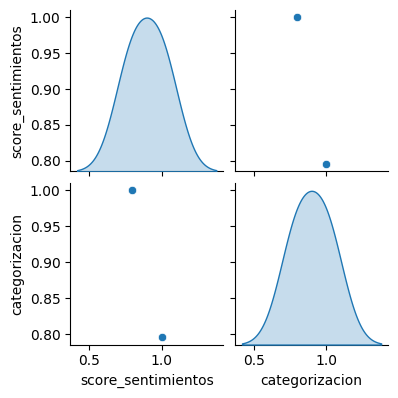

In [48]:
# Seleccionar las columnas deseadas en una lista
columns = ['score_sentimientos','categorizacion']
# Obtener el DataFrame con las columnas seleccionadas
selected_df = data2[columns]

# Calcular la matriz de correlación
correlation_data = selected_df.corr()

# Crear el pairplot
sns.pairplot(correlation_data, diag_kind='kde', size=2)

4. Se utiliza heatmap de seaborn para observar la correlación en forma de mapa de calor con datos numéricos entre los datos cuantitativos.

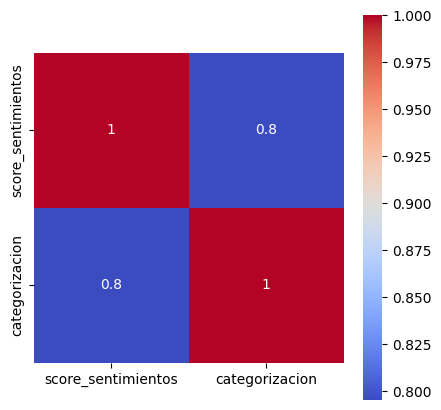

In [53]:
# Se crea una figura con tamaño 5x5
plt.figure(figsize=(5,5))

# Se genera el mapa de calor con las correlaciones
sns.heatmap(selected_df.corr(), annot=True, square=True, cmap='coolwarm')

# Se genera la visualización del mapa de calor
plt.show()

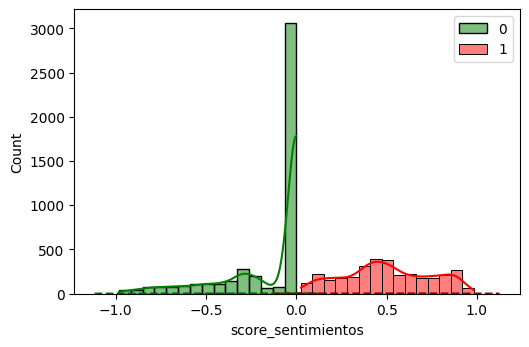

In [59]:
# Se define el número de contenedores en los histogramas
bins = 15

# Se crea una figura con tamaño 10x10
plt.figure(figsize=(10, 10))

#Se crea un subgráfico para que se observen los histogramas
plt.subplot(3, 2, 1)

# Se utiliza hisplot de seaborn para graficar los histogramas por variable
sns.histplot(data2[data2['categorizacion'] == 0]['score_sentimientos'], bins=bins, color='green', label='0', kde=True)

# Se utiliza kdeplot de seaborn para trazar la distribución normal por variable
sns.kdeplot(data2[data2['categorizacion'] == 0]['score_sentimientos'], color='darkgreen', linestyle='--')

sns.histplot(data2[data2['categorizacion'] == 1]['score_sentimientos'], bins=bins, color='red', label='1', kde=True)
sns.kdeplot(data2[data2['categorizacion'] == 1]['score_sentimientos'], color='darkred', linestyle='--')

# Muestra la leyenda
plt.legend(loc='upper right')

# Ajusta los subgrpaficos y los espacios para un mejor diseño
plt.tight_layout()

# Muestra el gráfico generado
plt.show()

## Modelo de regresión logística

1. Se definen la variables X e Y

In [60]:
# X será la variable score_sentimientos del dataset
X=data2.score_sentimientos

In [61]:
# Y será la variable categorizacion que contiene:
# 1= buen comentario -- 0= mal comentario
y=data2.categorizacion

2. Se instala la librería skitlearn para utilizar las regresiones

In [ ]:
# pip install scikit-learn

3. Se implementa la regresión logística desde sklearn

In [62]:
## Implementamos la regresión logística
from sklearn.model_selection import train_test_split

4. Se separan los datos en "train" datos entrenados y "test" datos de prueba

In [63]:
# Se usará el 20% de estos datos para la prueba
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

5. Se escalan los datos para que todos tengan la misma medida o magnitud.

In [66]:
from sklearn.preprocessing import StandardScaler

escalar = StandardScaler()
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)


6. Se define el algoritmo a usar, en este caso por los tipos de datos en clasificación, se usará la REGRESIÓ LOGÍSTICA

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
algoritmo =LogisticRegression()

In [69]:
# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

7. Realizamos una predicción de los datos a prueba (estos siempre son aleatorios por default)

In [70]:
y_pred=algoritmo.predict(X_test)

In [71]:
# Se muestran los datos predichos
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [72]:
# Se muestran los datos reales
y_test

7498    0
5195    1
834     1
2264    1
3247    0
       ..
6010    0
9779    0
1789    0
7371    1
9768    1
Name: categorizacion, Length: 1558, dtype: int64

8. Se utiliziará la Matriz de confusión para evaluar y analizar el rendimiento de un modelo de clasificación al mostrar la concordancia entre las etiquetas de clase reales y las etiquetas de clase predichas.

In [73]:
# Se importa la matriz confusión de sklearn
from sklearn.metrics import confusion_matrix

In [74]:
matriz=confusion_matrix(y_test,y_pred)
print('Matriz de confusión:', matriz) # Solo se evalúa un 20% de los datos
# 930 datos verdaderos positivos (datos reales 1 y el modelo dio 1)
# 604 datos verdaderos negativos (Datos reales 0 y el modelo dio 0)
# 0 datos que cambiaron de 1 a 0
# 24 datos que cambiaron de 0 a 1
# El modelo no predijo 24 datos

Matriz de confusión: [[930   0]
 [ 24 604]]


9. Se utiliza SVC de sklearn para saber las probabilidades de las clasificaciones de los datos según el modelo aplicado

In [75]:
from sklearn.svm import SVC

In [79]:
# Crear un estimador SVC
algoritmo2= SVC(probability=True)

# Ajustar el estimador a los datos de entrenamiento
algoritmo2.fit(X_train, y_train)

# Obtener las probabilidades de predicción para los datos de prueba
probas = algoritmo2.predict_proba(X_test)

print((np.round(probas,decimals=5)))

[[0.99757 0.00243]
 [0.      1.     ]
 [0.      1.     ]
 ...
 [1.      0.     ]
 [0.      1.     ]
 [0.      1.     ]]


10. Se usa GaussianNaiveBayes para que ausma una distribución normal para conocer la precisión de la predicción de las variables entrenadas y de prueba

In [80]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB().fit(X_train, y_train)
predicted = nbclf.predict(X_test)
print('Análisis de predicción de sentimientos de Bitcoin en Twitter')
print('Precisión del clasificador GaussianNB en el conjunto de entrenamiento: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Precisión del clasificador GaussianNB en el conjunto de prueba: {:.2f}'.format(nbclf.score(X_test, y_test)))

Análisis de predicción de sentimientos de Bitcoin en Twitter
Precisión del clasificador GaussianNB en el conjunto de entrenamiento: 0.94
Precisión del clasificador GaussianNB en el conjunto de prueba: 0.94


11. Se usa Metrics para evaluar y comparar el desempeño del modelo, en este caso, utilizaremos las del tipo clasificación por los tipos de datos

In [82]:
from sklearn import metrics

print("Informe de clasificación para clasificador %s:\n%s\n"
      % (nbclf, metrics.classification_report(y_test, predicted)))

Informe de clasificación para clasificador GaussianNB():
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       930
           1       1.00      0.84      0.91       628

    accuracy                           0.94      1558
   macro avg       0.95      0.92      0.93      1558
weighted avg       0.94      0.94      0.93      1558




-PRECISIÓN: Relación entre las predicciones correctas previstas (0:mal comentario tiene una precisión de predicción de 0.9, un valor alto)
-SENSIBILIDAD: Relación entre las predicciones positivas correctas y el número total de predicciones positivas, cuán sensible es el clasificador para detectar instancias positivas (1:buen comentario tiene una sensibilidad del 0.84, un valor alto)
-PUNTUACIÓN F-1: Es la medida armónica de la memoria y precisión, toma en cuenta los falsos positivos y negativos
-APOYO: Son los datos que fueron predichos como realmente estaban en el modelo (0: mal comentario, 930 datos que eran 0 desde el inicio, fueron predichos con 0, su mismo valor en el modelo implementado)
-EXACTITUD: Se utiliza para evaluar el rendimiento de un modelo de clasificación y representa la proporción de predicciones correctas realizadas.
-PROMEDIO MACRO: Calcula el promedio de las métricas para cada clase.
-PESO PROMEDIO: Calcula el promedio de las métricas en todas las clases.

## Conclusión

El modelo tiene una precisión de 0.94, por lo que su precisión es casi perfecta en este tipo de datasets de clasificación